In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading CSV from link
def read_csv_from_link(url):
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    df = pd.read_csv(path,delimiter="\t",error_bad_lines=False, header=None)
    return df

In [3]:
# Loading All Data
tamil_train = read_csv_from_link('https://drive.google.com/file/d/15auwrFAlq52JJ61u7eSfnhT9rZtI5sjk/view?usp=sharing')
tamil_dev = read_csv_from_link('https://drive.google.com/file/d/1Jme-Oftjm7OgfMNLKQs1mO_cnsQmznRI/view?usp=sharing')
mal_train = read_csv_from_link('https://drive.google.com/file/d/13JCCr-IjZK7uhbLXeufptr_AxvsKinVl/view?usp=sharing')
mal_dev = read_csv_from_link('https://drive.google.com/file/d/1J0msLpLoM6gmXkjC6DFeQ8CG_rrLvjnM/view?usp=sharing')
kannada_train = read_csv_from_link('https://drive.google.com/file/d/1XuOhSpdK8qsbO-lZHrIcVaU5FsCXc05T/view?usp=sharing')
kannada_dev = read_csv_from_link('https://drive.google.com/file/d/164zYZOeXIwt5jl3NggJU0CWRyD2fRT9z/view?usp=sharing')

b'Skipping line 2399: expected 2 fields, saw 3\nSkipping line 2525: expected 2 fields, saw 3\n'
b'Skipping line 777: expected 2 fields, saw 3\n'


In [4]:
# Tamil Preprocess
tamil_train = tamil_train.iloc[:, 0:2]
tamil_train = tamil_train.rename(columns={0: "text", 1: "label"})

tamil_dev = tamil_dev.iloc[:, 0:2]
tamil_dev = tamil_dev.rename(columns={0: "text", 1: "label"})

# Stats
tamil_train['label'] = pd.Categorical(tamil_train.label)
tamil_dev['label'] = pd.Categorical(tamil_dev.label)

### Load Model

In [5]:
import torch

In [13]:
!gpustat

devi                     Sat Jan  9 01:58:13 2021  450.51.05
[0] Tesla P100-PCIE-12GB | 36'C,   0 % |  4959 / 12198 MB | punyajoy(4953M) gdm(4M)
[1] Tesla P100-PCIE-16GB | 46'C,   0 % | 16275 / 16280 MB | punyajoy(13875M) punyajoy(1943M) punyajoy(451M) gdm(4M)


In [10]:
print("GPU Nos: {}".format(torch.cuda.device_count()))
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_name(1))

# Change Device - CPU/GPU-0/GPU-1
torch.cuda.set_device(0)
device = 'cuda'
device = device if torch.cuda.is_available() else 'cpu'

GPU Nos: 2
Tesla P100-PCIE-12GB
Tesla P100-PCIE-16GB


## Enter Path of Saved model here in torch.load()

In [11]:
# Model Select
import os
from os import listdir
from os.path import isfile, join
f = listdir('../../finetuned_models/')
f

['fusion_kannada_XLMroberta_base_kannadaMbert_base_cased_kannada_cnn_128laser_knlaser_en.pth',
 'MURIL_cased_temp_offensive_only_kannada.pth',
 'Indic_bert_collated_Tamil.pth',
 'XLMroberta_custom_pretrained_Malayalam.pth',
 'fusion_kannada_XLMroberta_base_kannadaXLMroberta_custom_pretrained_kannadaMbert_base_cased_kannadaIndic_bert_kannada_cnn_128laser_knlaser_en.pth',
 'XLMroberta_base_offensive_only_malayalam_weighted.pth',
 'XLMroberta_large_collated_kannada.pth',
 'Scratch_custom.pth',
 'XLMroberta_large_kannada.pth',
 'Distilbert_m_base_cased_Malayalam_weighted.pth',
 'Tamillion_X.pth',
 'fusion_tamil_XLMroberta_base_TamilXLMroberta_custom_pretrained_tamil_weighted_cnn_128.pth',
 'Indic_bert_collated_malayalam_weighted.pth',
 'XLMroberta_custom_pretrained_collated_malayalam_weighted.pth',
 'XLMroberta_large_offensive_only_Tamil.pth',
 'XLMroberta_base_Tamil_soft_F1_loss.pth',
 'Indic_bert_Malayalam_weighted.pth',
 'fusion_kannada_XLMroberta_base_kannada_weightedMbert_base_cased_k

In [12]:
saved_model_filenames = [
    'XLMroberta_base_Tamil.pth',
    'Indic_bert_Tamil.pth',
    'Mbert_base_cased_Tamil.pth',
    'XLMroberta_custom_pretrained_Tamil_Weighted[0.01 1.   1.   1.   1.   1.  ].pth',
    'Mbert_base_cased_Tamil[ 0.23034415  4.0278542  12.89977974  2.29037935  2.01531315  2.4995732 ].pth',
    'XLMroberta_from_custom_pretrained_Tamil.pth',
    'XLMroberta_large_Tamil.pth',
    'Distilbert_m_base_cased_Tamil.pth',
    'MURIL_cased_temp_Tamil.pth',
    "XLMroberta_large_tamil_weighted.pth",
    "XLMroberta_custom_pretrained_tamil_weighted.pth",
    "Mbert_base_cased_tamil_weighted.pth",
    "MURIL_cased_temp_tamil_weighted.pth",
    "Indic_bert_tamil_weighted.pth",
    "XLMroberta_base_tamil_weighted.pth",
    "Distilbert_m_base_cased_tamil_weighted.pth",
]

In [13]:
model_pretrained_keys = [
    'xlm-roberta-base',
    'ai4bharat/indic-bert',
    'bert-base-multilingual-cased',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    'xlm-roberta-base',
    'xlm-roberta-large',
    'distilbert-base-multilingual-cased',
    "simran-kh/muril-cased-temp",
    'xlm-roberta-large',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    "simran-kh/muril-cased-temp",
    'ai4bharat/indic-bert',
    'xlm-roberta-base',
    'distilbert-base-multilingual-cased',
]

### Get predictions

In [11]:
tokenizers = []
models = []

In [12]:
# Loading Model
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification

for model_name, pretrained_key in zip(saved_model_filenames, model_pretrained_keys):
    
    if pretrained_key == 'distilbert-base-multilingual-cased':
        tokenizer = BertTokenizer.from_pretrained(pretrained_key)
        model = BertForSequenceClassification.from_pretrained(pretrained_key, num_labels=6)
    else:
        tokenizer = AutoTokenizer.from_pretrained(pretrained_key)
        model = AutoModelForSequenceClassification.from_pretrained(pretrained_key, num_labels=6)
        
    state_dict = torch.load(os.path.join('../../finetuned_models/', model_name))
    model.load_state_dict(state_dict)
    model.eval()
    
    models.append(model)
    tokenizers.append(tokenizer)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

RuntimeError: CUDA error: out of memory

### Dataset Stuff

In [14]:
label_mapping = {
    'Not_offensive': 0, 
    'not-Tamil': 1, 
    'Offensive_Targeted_Insult_Other': 2, 
    'Offensive_Targeted_Insult_Group': 3, 
    'Offensive_Untargetede': 4, 
    'Offensive_Targeted_Insult_Individual': 5
}

# Collecting Text and Labels
train_batch_sentences = list(tamil_train['text'])
train_batch_labels =  [label_mapping[x] for x in tamil_train['label']]
dev_batch_sentences = list(tamil_dev['text'])
dev_batch_labels =  [label_mapping[x] for x in tamil_dev['label']]

# Convert to Tensor
train_encodings = [tokenizer(train_batch_sentences, padding='max_length', truncation=True, max_length=64, return_tensors="pt") for tokenizer in tokenizers]
train_labels = torch.tensor(train_batch_labels)
dev_encodings = [tokenizer(dev_batch_sentences, padding='max_length', truncation=True, max_length=64, return_tensors="pt") for tokenizer in tokenizers]
dev_labels = torch.tensor(dev_batch_labels)

NameError: name 'tokenizers' is not defined

In [ ]:
# Dataset
from torch.utils.data import Dataset

class Tamil_Offensive_Dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Defining Datasets
train_datasets = [Tamil_Offensive_Dataset(tenc, train_labels) for tenc in train_encodings]
dev_datasets = [Tamil_Offensive_Dataset(denc, dev_labels) for denc in dev_encodings]

In [ ]:
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, f1_score

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
all_dev_preds = []

for model, dev_dataset in tqdm(zip(models, dev_datasets), total = len(models)):
    model.to(device)
    # Dataloaders
    dev_loader = DataLoader(dev_dataset, batch_size=16, shuffle=False)

    dev_preds = []
    with torch.set_grad_enabled(False):
        for batch in tqdm(dev_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

            for logits in outputs[1].cpu().numpy():
                dev_preds.append(np.exp(logits)/np.sum(np.exp(logits)))
    
    # Add All together
    all_dev_preds.append(dev_preds)

#### SAVE PREDS

In [ ]:
for dev_preds, modelname in zip(all_dev_preds, saved_model_filenames):
    np.save('../../model_prediction_probs/preds_'+modelname+'.npy', dev_preds)

#### Load preds

In [11]:
# Model Select
import os
from os import listdir
from os.path import isfile, join
xl = listdir('../../model_prediction_probs/')
xo = [x for x in xl if 'GA' not in x and 'offensive' not in x and 'amil' in x and 'coll' not in x and 'fusion' not in x and 'final' not in x]

In [12]:
xo

['Indic_bert_tamil_weighted.pth.npy',
 'MURIL_cased_temp_Tamil.pth.npy',
 'MURIL_cased_temp_tamil_weighted.pth.npy',
 'XLMroberta_large_tamil_weighted.pth.npy',
 'Mbert_base_cased_tamil_weighted.pth.npy',
 'Distilbert_m_base_cased_tamil_weighted.pth.npy',
 'XLMroberta_large_Tamil.pth.npy',
 'Mbert_base_cased_Tamil[ 0.23034415  4.0278542  12.89977974  2.29037935  2.01531315  2.4995732 ].pth.npy',
 'XLMroberta_base_Tamil.pth.npy',
 'XLMroberta_custom_pretrained_tamil_weighted.pth.npy',
 'XLMroberta_base_tamil_weighted.pth.npy',
 'Mbert_base_cased_Tamil.pth.npy',
 'Indic_bert_Tamil.pth.npy',
 'XLMroberta_custom_pretrained_Tamil_Weighted[0.01 1.   1.   1.   1.   1.  ].pth.npy',
 'XLMroberta_from_custom_pretrained_Tamil.pth.npy',
 'Distilbert_m_base_cased_Tamil.pth.npy']

In [13]:
load_model_filenames = xo

In [14]:
len(load_model_filenames)

16

In [16]:
load_model_filenames = [
    'XLMroberta_large_tamil_weighted.pth.npy',
    'Distilbert_m_base_cased_Tamil.pth.npy',
    'XLMroberta_large_Tamil.pth.npy',
    'Mbert_base_cased_Tamil[ 0.23034415  4.0278542  12.89977974  2.29037935  2.01531315  2.4995732 ].pth.npy',
    'XLMroberta_base_Tamil.pth.npy',
    'Indic_bert_Tamil.pth.npy',
    'MURIL_cased_temp_Tamil.pth.npy',
    'XLMroberta_from_custom_pretrained_Tamil.pth.npy',
    'XLMroberta_custom_pretrained_tamil_weighted.pth.npy',
    'Mbert_base_cased_tamil_weighted.pth.npy',
    'XLMroberta_custom_pretrained_Tamil_Weighted[0.01 1.   1.   1.   1.   1.  ].pth.npy',
    'MURIL_cased_temp_tamil_weighted.pth.npy',
    'Indic_bert_tamil_weighted.pth.npy',
    'XLMroberta_base_tamil_weighted.pth.npy',
    'Mbert_base_cased_Tamil.pth.npy',
    'Distilbert_m_base_cased_tamil_weighted.pth.npy'
]

model_pretrained_keys = [
    'xlm-roberta-large',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-large',
    'bert-base-multilingual-cased',
    'xlm-roberta-base',
    'ai4bharat/indic-bert',
    "simran-kh/muril-cased-temp",
    'xlm-roberta-base',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    'xlm-roberta-base',
    "simran-kh/muril-cased-temp",
    'ai4bharat/indic-bert',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    'distilbert-base-multilingual-cased',
]

all_dev_preds = []
for pred in load_model_filenames:
    all_dev_preds.append(np.load('../../model_prediction_probs/' + pred))

In [17]:
len(load_model_filenames)

16

In [19]:
from sklearn.metrics import classification_report, f1_score

In [20]:
label_mapping = {
    'Not_offensive': 0, 
    'not-Tamil': 1, 
    'Offensive_Targeted_Insult_Other': 2, 
    'Offensive_Targeted_Insult_Group': 3, 
    'Offensive_Untargetede': 4, 
    'Offensive_Targeted_Insult_Individual': 5
}

# Collecting Text and Labels
train_batch_sentences = list(tamil_train['text'])
train_batch_labels =  [label_mapping[x] for x in tamil_train['label']]
dev_batch_sentences = list(tamil_dev['text'])
dev_batch_labels =  [label_mapping[x] for x in tamil_dev['label']]

for dev_preds, mn in zip(all_dev_preds, load_model_filenames):
    final_dev_preds = np.argmax(dev_preds, axis = 1)
    y_true = dev_batch_labels
    y_pred = final_dev_preds
    target_names = label_mapping.keys()
    report = classification_report(y_true, y_pred, target_names=target_names)
    print(mn)
    print(report)

XLMroberta_large_tamil_weighted.pth.npy
                                      precision    recall  f1-score   support

                       Not_offensive       0.00      0.00      0.00      3193
                           not-Tamil       0.04      1.00      0.08       172
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        65
     Offensive_Targeted_Insult_Group       0.00      0.00      0.00       295
               Offensive_Untargetede       0.00      0.00      0.00       356
Offensive_Targeted_Insult_Individual       0.00      0.00      0.00       307

                            accuracy                           0.04      4388
                           macro avg       0.01      0.17      0.01      4388
                        weighted avg       0.00      0.04      0.00      4388

Distilbert_m_base_cased_Tamil.pth.npy
                                      precision    recall  f1-score   support

                       Not_offensive       0.85      0.91   

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Averaging Ensemble

In [35]:
all_dev_preds = np.array(all_dev_preds)
# Initialise Weights
w = np.ones(all_dev_preds.shape[0])
softmax_w = np.exp(w)/np.sum(np.exp(w))

weighted_all_dev_preds = np.array([sw*dpreds for sw, dpreds in zip(softmax_w, all_dev_preds)])
weighted_dev_preds = np.sum(weighted_all_dev_preds, axis = 0)
final_dev_preds = np.argmax(weighted_dev_preds, axis = 1)

In [37]:
y_true = dev_batch_labels
y_pred = final_dev_preds
target_names = label_mapping.keys()
report = classification_report(y_true, y_pred, target_names=target_names)

In [38]:
print(report)

                                      precision    recall  f1-score   support

                       Not_offensive       0.89      0.91      0.90      3193
                           not-Tamil       0.86      0.89      0.88       172
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        65
     Offensive_Targeted_Insult_Group       0.41      0.43      0.42       295
               Offensive_Untargetede       0.48      0.46      0.47       356
Offensive_Targeted_Insult_Individual       0.52      0.46      0.49       307

                            accuracy                           0.80      4388
                           macro avg       0.53      0.52      0.52      4388
                        weighted avg       0.78      0.80      0.79      4388



### Optimising with GA

 The best solution found:                                                                           
 [3.50287451 3.42714936 4.61306262 3.75668652 3.35036097 2.54784582
 3.61279716 4.14064798 4.05667854 1.64868604 2.0621329  3.18505631
 3.16007808 3.52470656 4.30048129 2.23459362]

 Objective function:
 0.20088652621660652


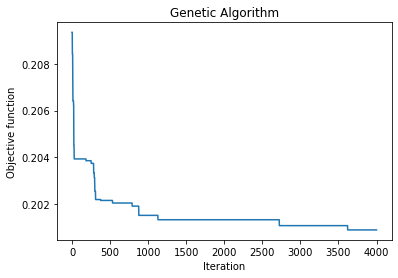

In [21]:
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    softmax_w = np.exp(X)/np.sum(np.exp(X))
    weighted_all_dev_preds = np.array([sw*dpreds for sw, dpreds in zip(softmax_w, all_dev_preds)])
    weighted_dev_preds = np.sum(weighted_all_dev_preds, axis = 0)
    final_dev_preds = np.argmax(weighted_dev_preds, axis = 1)

    y_true = dev_batch_labels
    y_pred = final_dev_preds
    score = f1_score(y_true, y_pred, average='weighted')
    return 1-score

varbound=np.array([[0, 5]]*all_dev_preds.shape[0])

model=ga(function=f,dimension=all_dev_preds.shape[0],variable_type='real',variable_boundaries=varbound)

model.run()

In [24]:
convergence=model.report
solution=model.output_dict

In [25]:
solution

{'variable': array([3.50287451, 3.42714936, 4.61306262, 3.75668652, 3.35036097,
        2.54784582, 3.61279716, 4.14064798, 4.05667854, 1.64868604,
        2.0621329 , 3.18505631, 3.16007808, 3.52470656, 4.30048129,
        2.23459362]),
 'function': 0.20088652621660652}

In [39]:
X = solution['variable']

NameError: name 'solution' is not defined

In [40]:
import pickle
saved_model_filename = 'GA_tamil_v1'

with open("../../dev_preds/weights_" + saved_model_filename + ".pickle", 'rb') as handle:
    mw = pickle.load(handle)
    
X = [mw[index][0] for index in mw.keys()]

In [41]:
X

[3.502874513387141,
 3.4271493615737363,
 4.613062624093756,
 3.756686520882169,
 3.3503609716553395,
 2.5478458171732794,
 3.612797164824678,
 4.140647982150272,
 4.0566785354752835,
 1.6486860434775181,
 2.062132901324693,
 3.1850563134890155,
 3.1600780799724872,
 3.5247065552175805,
 4.3004812883262105,
 2.2345936198354237]

In [46]:
softmax_w = np.exp(X)/np.sum(np.exp(X))
weighted_all_dev_preds = np.array([sw*dpreds for sw, dpreds in zip(softmax_w, all_dev_preds)])
weighted_dev_preds = np.sum(weighted_all_dev_preds, axis = 0)
final_dev_preds = np.argmax(weighted_dev_preds, axis = 1)

y_true = dev_batch_labels
y_pred = final_dev_preds
target_names = label_mapping.keys()
report = classification_report(y_true, y_pred, target_names=target_names)

In [47]:
print(report)

                                      precision    recall  f1-score   support

                       Not_offensive       0.88      0.93      0.91      3193
                           not-Tamil       0.87      0.87      0.87       172
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        65
     Offensive_Targeted_Insult_Group       0.49      0.41      0.44       295
               Offensive_Untargetede       0.50      0.47      0.49       356
Offensive_Targeted_Insult_Individual       0.55      0.49      0.52       307

                            accuracy                           0.81      4388
                           macro avg       0.55      0.53      0.54      4388
                        weighted avg       0.79      0.81      0.80      4388



In [48]:
f1_score(y_true, y_pred, average='macro')

0.5369532213406898

### Save stuff

In [49]:
saved_model_filename = 'GA_tamil_v1'
np.savetxt("../../dev_preds/" + saved_model_filename + ".csv", final_dev_preds, delimiter=",")

In [50]:
np.save("../../model_prediction_probs/"+saved_model_filename+".npy", weighted_dev_preds)

In [30]:
a = {x:(y,z) for x, y, z in zip(load_model_filenames, np.array(solution['variable']), model_pretrained_keys)}

In [32]:
import pickle
with open("../../dev_preds/weights_" + saved_model_filename + ".pickle", 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)